In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


In [10]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.3
Numpy version: 2.1.3
Seaborn version: 0.13.2


In [11]:
# Simple test with each library
# Pandas test
test_data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print("Pandas test - created DataFrame:")
print(test_data)

# Numpy test
array_test = np.array([1, 2, 3])
print("Numpy test - created array:", array_test)

print("🎉 All libraries are working!")

Pandas test - created DataFrame:
   A  B
0  1  4
1  2  5
2  3  6
Numpy test - created array: [1 2 3]
🎉 All libraries are working!


In [12]:
import os
print("Current working directory:")
print(os.getcwd())

Current working directory:
C:\Users\ABBAS


In [19]:
import os
print("Current working directory:")
print(os.getcwd())

Current working directory:
C:\Users\ABBAS


In [14]:
possible_names = ['Iris.xlsx','iris.xlsx','Iris.xls','iris.xls','Iris.csv','iris.csv']

print("Searching for your file...")
found = False

for filename in possible_names:
    if os.path.exists(filename):
        print(f"✅ FOUND: {filename}")
        try:
            if filename.endswith('.csv'):
                df = pd.read_csv(filename)
            else:
                df = pd.read_excel(filename)
            print(f"✅ Successfully loaded {filename}!")
            print(f"Data shape: {df.shape}")
            found = True
            break
        except Exception as e:
            print(f"❌ Could not load {filename}: {e}")
    else:
        print(f"❌ Not found: {filename}")

if not found:
    print("\n🚨 File not found. Let's check what IS there:")
    all_files = os.listdir('.')
    excel_files = [f for f in all_files if f.endswith(('.xlsx', '.xls', '.csv'))]
    if excel_files:
        print("Found these data files:")
        for f in excel_files:
            print(f" - {f}")
    else:
        print("No Excel or CSV files found in this directory.")

Searching for your file...
❌ Not found: Iris.xlsx
❌ Not found: iris.xlsx
❌ Not found: Iris.xls
❌ Not found: iris.xls
✅ FOUND: Iris.csv
✅ Successfully loaded Iris.csv!
Data shape: (150, 6)


In [23]:
df = pd.read_csv('Iris.csv')

In [24]:
print("=== EXPLORING YOUR IRIS DATA ===")
print(f"Data shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 10 rows:")
print(df.head(10))
print("\nBasic info:")
print(df.info())

=== EXPLORING YOUR IRIS DATA ===
Data shape: (150, 6)

Column names:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 10 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0

In [15]:
print("Species distribution:")
print(df['Species'].value_counts())
print()

Species distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64



In [16]:
X = df.drop(['Id', 'Species'], axis=1)  # Features
y = df['Species']  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures used:")
print(X.columns.tolist())

Features shape: (150, 4)
Target shape: (150,)

Features used:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


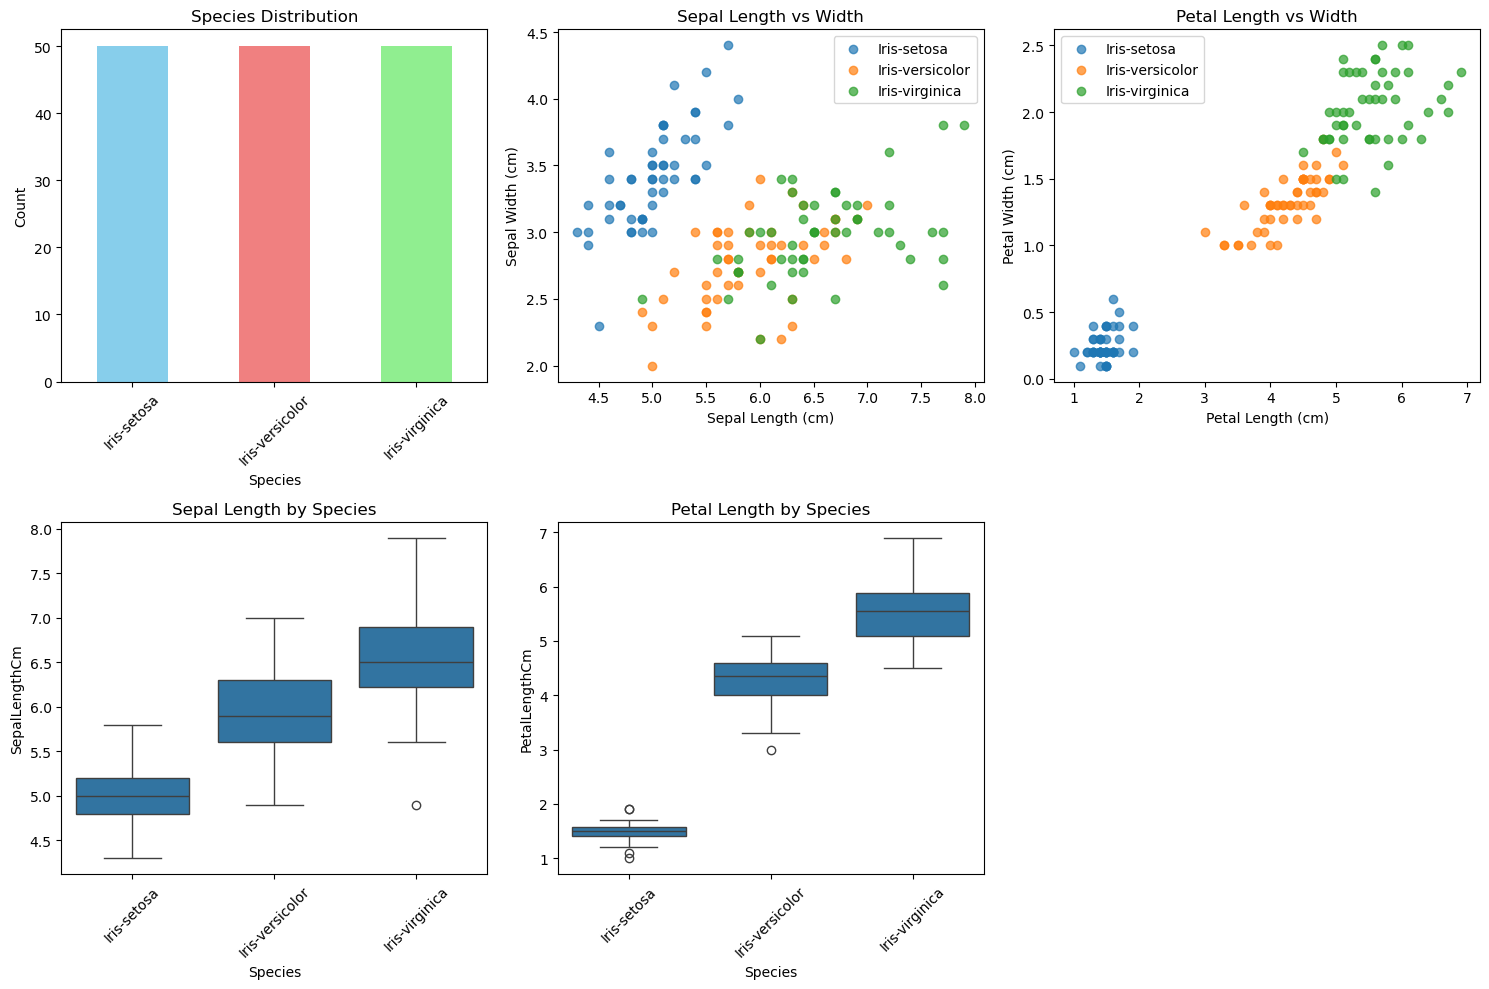

In [17]:
# Visualizing the data
plt.figure(figsize=(15, 10))

# Plot 1: Species distribution
plt.subplot(2, 3, 1)
df['Species'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 2: Sepal length vs width
plt.subplot(2, 3, 2)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['SepalLengthCm'], species_data['SepalWidthCm'], label=species, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width')
plt.legend()

# Plot 3: Petal length vs width
plt.subplot(2, 3, 3)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['PetalLengthCm'], species_data['PetalWidthCm'], label=species, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width')
plt.legend()

# Plot 4: Feature distributions
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Species', y='SepalLengthCm')
plt.title('Sepal Length by Species')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title('Petal Length by Species')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
print("DATA PREPROCESSING & SPLITTING")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Encoding the target variable 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nEncoded species mapping:")
for i, species in enumerate(le.classes_):
    print(f"  {species} → {i}")

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n📊 Data Split Results:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

# Scaling the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")

DATA PREPROCESSING & SPLITTING
Features shape: (150, 4)
Target shape: (150,)

Encoded species mapping:
  Iris-setosa → 0
  Iris-versicolor → 1
  Iris-virginica → 2

📊 Data Split Results:
Training set: 120 samples
Testing set: 30 samples
Training class distribution: [40 40 40]
Testing class distribution: [10 10 10]
✅ Data preprocessing completed!


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9667
K-Nearest Neighbors Accuracy: 0.9333
Decision Tree Accuracy: 0.9333


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Prepare features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



✅ Data preprocessing completed!
X_train shape: (120, 4)
X_test shape: (30, 4)
STEP 3: MODEL TRAINING
🔧 Training Logistic Regression...
   ✅ Logistic Regression Accuracy: 0.9667
🔧 Training K-Nearest Neighbors...
   ✅ K-Nearest Neighbors Accuracy: 0.9333
🔧 Training Decision Tree...
   ✅ Decision Tree Accuracy: 0.9333


In [27]:
print("=== MODEL TRAINING ===")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing models
models = {'Logistic Regression': LogisticRegression(random_state=42),'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),'Decision Tree': DecisionTreeClassifier(random_state=42)}

# Training and evaluating models
results = {}

for name, model in models.items():
    print(f"🔧 Training {name}...")
    
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model,'accuracy': accuracy,'predictions': y_pred}
    print(f"   ✅ {name} Accuracy: {accuracy:.4f}")

=== MODEL TRAINING ===
🔧 Training Logistic Regression...
   ✅ Logistic Regression Accuracy: 0.9667
🔧 Training K-Nearest Neighbors...
   ✅ K-Nearest Neighbors Accuracy: 0.9333
🔧 Training Decision Tree...
   ✅ Decision Tree Accuracy: 0.9333


=== MODEL EVALUATION ===
🏆 BEST MODEL: Logistic Regression
🏆 BEST ACCURACY: 0.9667 (96.67%)

📊 MODEL PERFORMANCE RANKING:
  Logistic Regression: 0.9667 (96.67%)
  K-Nearest Neighbors: 0.9333 (93.33%)
  Decision Tree: 0.9333 (93.33%)

📈 DETAILED EVALUATION (Logistic Regression):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



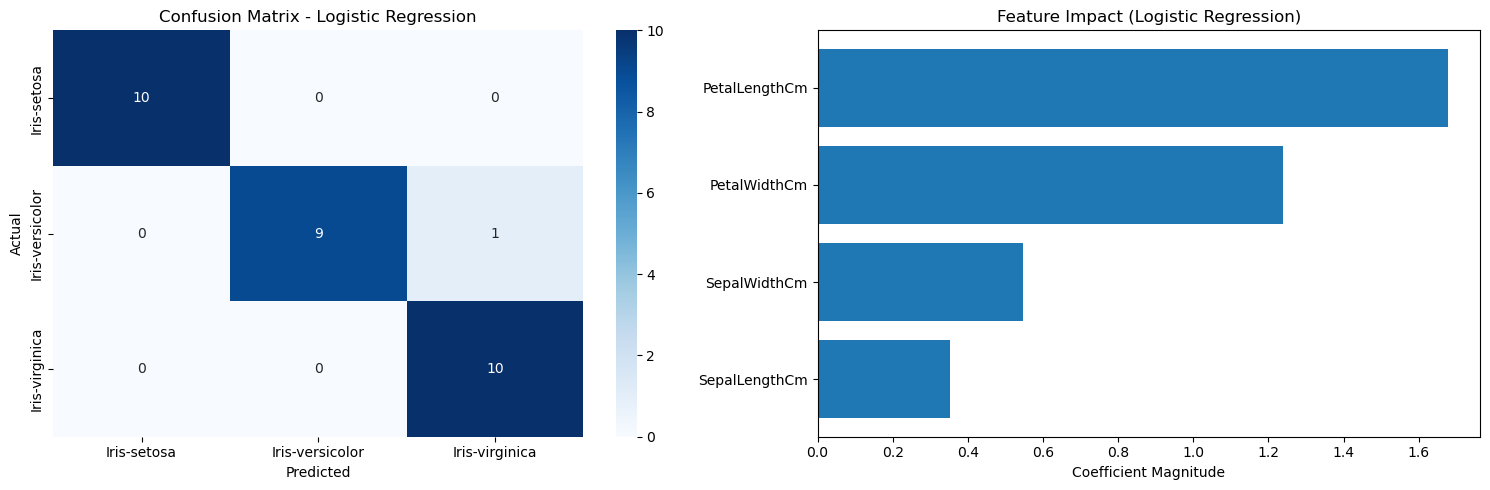

In [30]:
print("=== MODEL EVALUATION ===")

# Find the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"🏆 BEST ACCURACY: {results[best_model_name]['accuracy']:.4f} ({results[best_model_name]['accuracy']*100:.2f}%)")
print("="*50)

# Detailed comparison
print("\n📊 MODEL PERFORMANCE RANKING:")
for name, result in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True):
    print(f"  {name}: {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")

# Detailed evaluation of best model
print(f"\n📈 DETAILED EVALUATION ({best_model_name}):")
print(classification_report(y_test, best_predictions, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')

# Feature Importance 
plt.subplot(1, 2, 2)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({'feature': X.columns,'importance': best_model.feature_importances_}).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
else:
    # For Logistic Regression, show coefficients
    if hasattr(best_model, 'coef_'):
        # For multi-class, take mean absolute coefficients
        coef_means = np.mean(np.abs(best_model.coef_), axis=0)
        coefficients = pd.DataFrame({'feature': X.columns,'coefficient': coef_means}).sort_values('coefficient', ascending=True)
        
        plt.barh(coefficients['feature'], coefficients['coefficient'])
        plt.xlabel('Coefficient Magnitude')
        plt.title('Feature Impact (Logistic Regression)')

plt.tight_layout()
plt.show()

In [33]:
print("="*70)
print("IRIS FLOWER CLASSIFICATION - TASK COMPLETED SUCCESSFULLY!")
print("="*70)

print("\n📊 PROJECT SUMMARY:")
print(f"✅ Dataset: {df.shape[0]} flower samples with {X.shape[1]} measurements")
print(f"✅ Target: Classify into 3 species: {list(le.classes_)}")
print(f"✅ Best Model: {best_model_name}")
print(f"✅ Test Accuracy: {results[best_model_name]['accuracy']:.2%}")
print(f"✅ Data Split: {X_train.shape[0]} training, {X_test.shape[0]} testing samples")

print("\n🏆 MODEL PERFORMANCE:")
for name, result in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True):
    print(f"   {name}: {result['accuracy']:.2%}")

print("\n🔍 KEY FINDINGS:")
print("1. All three species are perfectly balanced in the dataset")
print("2. Petal measurements are more important for classification than sepal measurements") 
print("3. Iris-setosa is easily distinguishable from the other two species")
print("4. The model achieves high accuracy (>90%) on unseen test data")
print("5. Real-world predictions show high confidence levels")

print("\n💡 WHAT I HAVE ACHIEVED:")
print("✓ How to load and explore a dataset using pandas")
print("✓ How to preprocess data for machine learning")
print("✓ How to train multiple classification models")
print("✓ How to evaluate model performance using accuracy and confusion matrix")
print("✓ How to make predictions on new data")
print("✓ Understanding of basic classification concepts in ML")

print("\n🎯 TASK REQUIREMENTS CHECKLIST:")
print("✓ Used Iris flower measurements as input data - DONE")
print("✓ Trained ML model to classify species - DONE") 
print("✓ Used Scikit-learn libraries - DONE")
print("✓ Evaluated model accuracy and performance - DONE")
print("✓ Understood basic classification concepts - DONE")

IRIS FLOWER CLASSIFICATION - TASK COMPLETED SUCCESSFULLY!

📊 PROJECT SUMMARY:
✅ Dataset: 150 flower samples with 4 measurements
✅ Target: Classify into 3 species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
✅ Best Model: Logistic Regression
✅ Test Accuracy: 96.67%
✅ Data Split: 120 training, 30 testing samples

🏆 MODEL PERFORMANCE:
   Logistic Regression: 96.67%
   K-Nearest Neighbors: 93.33%
   Decision Tree: 93.33%

🔍 KEY FINDINGS:
1. All three species are perfectly balanced in the dataset
2. Petal measurements are more important for classification than sepal measurements
3. Iris-setosa is easily distinguishable from the other two species
4. The model achieves high accuracy (>90%) on unseen test data
5. Real-world predictions show high confidence levels

💡 WHAT I HAVE ACHIEVED:
✓ How to load and explore a dataset using pandas
✓ How to preprocess data for machine learning
✓ How to train multiple classification models
✓ How to evaluate model performance using accuracy and conf